# Assignment 2 of Data Mining 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea

/home/bigmb/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bigmb/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [163]:
dall = pd.read_csv('fer2018/fer2018.csv')

In [164]:
dall.size

71774

In [3]:
dall.shape

(35887, 2)

In [4]:
dall = dall.sample(frac=1)

In [5]:
all_count = dall['emotion'].value_counts()

In [6]:
print(dall['emotion'].value_counts())

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


## Checking the data of the files 

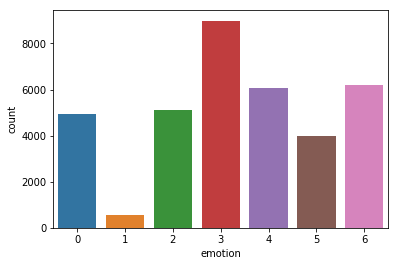

In [7]:
sea.countplot(dall['emotion'])

In [82]:
dall['pixels'].size

35887

## 500 data set values 

In [223]:
dall_0 = dall.loc[dall['emotion'] == 0];
dall0 = dall_0.iloc[0:500]
dall_1 = dall.loc[dall['emotion'] == 1];
dall1 = dall_1.iloc[0:500]
dall_2 = dall.loc[dall['emotion'] == 2];
dall2 = dall_2.iloc[0:500]
dall_3 = dall.loc[dall['emotion'] == 3];
dall3 = dall_3.iloc[0:500]
dall_4 = dall.loc[dall['emotion'] == 4];
dall4 = dall_4.iloc[0:500]
dall_5 = dall.loc[dall['emotion'] == 5];
dall5 = dall_5.iloc[0:500]
dall_6 = dall.loc[dall['emotion'] == 6];
dall6 = dall_6.iloc[0:500]

In [240]:
dall_500 = pd.concat([dall0,dall1,dall2,dall3,dall4,dall5,dall6], ignore_index=True)

In [241]:
dall_500.shape

(3500, 2)

In [242]:
dall_500 = dall_500.sample(frac=1)

In [245]:
emotion500_as_list = pandas_vector_to_list(dall_500['emotion'])
y_data1 = []
for index in range(len(dall_500['emotion'])):
    y_data1.append(emotion500_as_list[index])

In [246]:
np_image_array1 = []
for index, item in enumerate(dall_500['pixels']):
    # 48x48
    data = np.zeros((1,48* 48), dtype=np.uint8)
    # split space separated ints
    pixel_data = item.split()


    np_image_array1.append(np.array(pixel_data))

np_image_array1 = np.array(np_image_array1)
# convert to float and divide by 255
np_image_array1 = np_image_array1.astype('float32') / 255.0

In [247]:
from sklearn.model_selection import train_test_split  
X_train500, X_test500, y_train500, y_test500 = train_test_split(np_image_array1, y_data1, test_size=0.20)

In [249]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train500)

X_train500 = scaler.transform(X_train500)  
X_test500 = scaler.transform(X_test500) 

## GaussianNB of 500 data set 

In [250]:
model500 = GaussianNB()
model500.fit(X_train500, y_train500)

GaussianNB(priors=None, var_smoothing=1e-09)

In [251]:
labels500 = model.predict(X_test500)

In [252]:
from sklearn import metrics
print(metrics.classification_report(y_test500, labels500))
print(metrics.confusion_matrix(y_test500,labels500))

              precision    recall  f1-score   support

           0       0.17      0.05      0.08        98
           1       0.20      0.16      0.18       107
           2       0.35      0.06      0.10       102
           3       0.25      0.21      0.23        87
           4       0.23      0.42      0.30       113
           5       0.21      0.50      0.29        92
           6       0.14      0.09      0.11       101

   micro avg       0.21      0.21      0.21       700
   macro avg       0.22      0.21      0.18       700
weighted avg       0.22      0.21      0.18       700

[[ 5 15  3  9 34 26  6]
 [ 5 17  1 14 30 33  7]
 [ 4 12  6  4 32 34 10]
 [ 5  7  1 18 22 28  6]
 [ 3 13  4  7 48 27 11]
 [ 4  8  1  7 10 46 16]
 [ 4 12  1 13 35 27  9]]


In [8]:
dall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35887 entries, 7107 to 27817
Data columns (total 2 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


## Show Images 

In [9]:
def show_image(i):
    nd = dall['pixels'][i]
    val = nd.split(" ")
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    x_reshaped = x_pixels.reshape(48,48)
    plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")    
    plt.axis("off")
    plt.show()

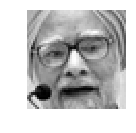

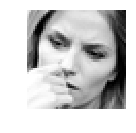

In [10]:
plt.figure(1)
plt.subplot(211)
show_image(1)
plt.subplot(212)
show_image(2)

In [11]:
NUM_CLASSES = 7
img_size = 48

## Preproccessing Dataset  

In [12]:
def pandas_vector_to_list(pandas_df):
    py_list = [item for item in pandas_df.values.tolist()]
    return py_list

In [13]:
emotion_as_list = pandas_vector_to_list(dall['emotion'])
y_data = []
for index in range(len(dall['emotion'])):
    y_data.append(emotion_as_list[index])

In [14]:
np_image_array = []
for index, item in enumerate(dall['pixels']):
    # 48x48
    data = np.zeros((1,48* 48), dtype=np.uint8)
    # split space separated ints
    pixel_data = item.split()


    np_image_array.append(np.array(pixel_data))

np_image_array = np.array(np_image_array)
# convert to float and divide by 255
np_image_array = np_image_array.astype('float32') / 255.0

In [345]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(np_image_array, y_data, test_size=0.20)

In [16]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [271]:
X_test.shape

(7178, 2304)

In [272]:
X_train.shape

(28709, 2304)

## GaussianNB of Whole Dataset

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
labels = model.predict(X_test)

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, labels))
print(metrics.confusion_matrix(y_test,labels))

              precision    recall  f1-score   support

           0       0.24      0.06      0.10       962
           1       0.03      0.21      0.05       111
           2       0.23      0.05      0.09      1024
           3       0.41      0.15      0.22      1830
           4       0.24      0.40      0.30      1221
           5       0.20      0.60      0.29       792
           6       0.24      0.13      0.17      1238

   micro avg       0.22      0.22      0.22      7178
   macro avg       0.23      0.23      0.17      7178
weighted avg       0.27      0.22      0.20      7178

[[ 57 134  32  80 329 262  68]
 [  5  23   0  14  24  38   7]
 [ 41 108  56  75 231 429  84]
 [ 55 228  52 281 457 574 183]
 [ 39 147  45  80 491 299 120]
 [ 15  79  22  53  93 473  57]
 [ 25 145  36 110 411 345 166]]


In [23]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0],(y_test != labels).sum(),100*(1-(y_test != labels).sum()/X_test.shape[0])))

Number of mislabeled points out of a total 7178 points : 5631, performance 21.55%


In [24]:
false_P, true_P, thresholds = metrics.roc_curve(y_test, labels, pos_label=2)

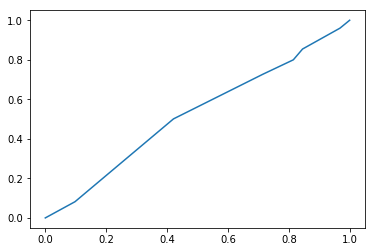

In [25]:
plt.plot(false_P,true_P)

In [26]:
auc = metrics.auc(false_P,true_P)
print('area under the curve is :', auc)

area under the curve is : 0.5227741865047124


In [27]:
acc = metrics.accuracy_score(y_test,labels)
print('accuracy of the system is :' ,acc )

accuracy of the system is : 0.2155196433546949


##  BernoullieNB of Whole Dataset

In [28]:
from sklearn.naive_bayes import BernoulliNB

In [29]:
model2 = BernoulliNB()
model2.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [30]:
labels2 = model2.predict(X_test)

In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, labels2))
print(metrics.confusion_matrix(y_test,labels2))

              precision    recall  f1-score   support

           0       0.20      0.05      0.08       962
           1       0.03      0.09      0.04       111
           2       0.17      0.05      0.08      1024
           3       0.41      0.10      0.17      1830
           4       0.23      0.41      0.29      1221
           5       0.18      0.63      0.28       792
           6       0.26      0.18      0.21      1238

   micro avg       0.21      0.21      0.21      7178
   macro avg       0.21      0.22      0.17      7178
weighted avg       0.26      0.21      0.18      7178

[[ 49  57  57  56 341 302 100]
 [  3  10   3  10  33  45   7]
 [ 47  54  53  54 263 464  89]
 [ 52  85  79 191 524 658 241]
 [ 52  74  59  53 497 338 148]
 [ 17  30  29  35 104 500  77]
 [ 26  42  34  64 434 411 227]]


In [32]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(X_test.shape[0],(y_test != labels2).sum(),100*(1-(y_test != labels2).sum()/X_test.shape[0])))

Number of mislabeled points out of a total 7178 points : 5651, performance 21.27%


In [33]:
false_P2, true_P2, thresholds2 = metrics.roc_curve(y_test, labels2, pos_label=2)

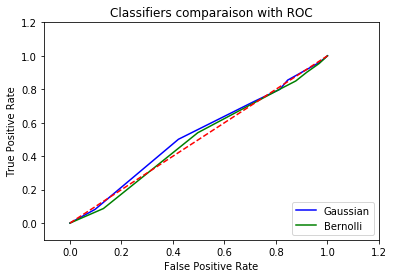

In [34]:
colors = ['b', 'g']
plt.plot(false_P, true_P, colors[0],label = 'Gaussian')
plt.plot(false_P2, true_P2, colors[1],label = 'Bernolli')
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
X_train[1]

#Can be normalized to get better ans.

array([ 1.5089488 ,  1.5600982 ,  1.5738102 , ..., -0.39696413,
       -0.45472115, -0.52667534], dtype=float32)

## Reading all the other datasets 

In [36]:
da = pd.read_csv('fer2018/fer2018angry.csv')
dd = pd.read_csv('fer2018/fer2018disgust.csv')
df = pd.read_csv('fer2018/fer2018fear.csv')
dh = pd.read_csv('fer2018/fer2018happy.csv')
dn = pd.read_csv('fer2018/fer2018neutral.csv')
ds = pd.read_csv('fer2018/fer2018sad.csv')
dsu = pd.read_csv('fer2018/fer2018surprise.csv')

In [37]:
def emotion_data_array(x):
    emotion_da = pandas_vector_to_list(x)
    y_data_da = []
    for index in range(len(x)):
        y_data_da.append(emotion_da[index])
    my_data_da = np.asarray(y_data_da) 
    return my_data_da

In [38]:
my_data_da = emotion_data_array(da['emotion'])
my_data_dd = emotion_data_array(dd['emotion'])
my_data_df = emotion_data_array(df['emotion'])
my_data_dh = emotion_data_array(dh['emotion'])
my_data_dn = emotion_data_array(dn['emotion'])
my_data_ds = emotion_data_array(ds['emotion'])
my_data_dsu = emotion_data_array(dsu['emotion'])

In [39]:
def np_image_data(x):
    np_image_da = []
    for index, item in enumerate(x):
        # split space separated ints
        pixel_data = item.split()
        np_image_da.append(np.array(pixel_data))
    np_image_da = np.array(np_image_da)
    np_image_da = np_image_da.astype('float32') / 255.0

    return np_image_da

## Getting the best Pixels of the datasets 

In [40]:
np_image_da = np_image_data(da['pixels'])
np_image_dd = np_image_data(dd['pixels'])
np_image_df = np_image_data(df['pixels'])
np_image_dh = np_image_data(dh['pixels'])
np_image_dn = np_image_data(dn['pixels'])
np_image_ds = np_image_data(ds['pixels'])
np_image_dsu = np_image_data(dsu['pixels'])

In [41]:
import scipy as sp
from scipy.stats import pearsonr

In [42]:
myarray = np.asarray(y_data)

In [43]:
def correlation_data(x, y):
    prob_cluster_da = []

    for i in range(y.shape[1]):  
        k = pearsonr(x,y[:,i])
        prob_cluster_da.append(k[0])
        
    return prob_cluster_da

In [44]:
prob_cluster_da = np.array(correlation_data(my_data_da,np_image_da))
prob_cluster_dd = np.array(correlation_data(my_data_dd,np_image_dd))
prob_cluster_df = np.array(correlation_data(my_data_df,np_image_df))
prob_cluster_dh = np.array(correlation_data(my_data_dh,np_image_dh))
prob_cluster_ds = np.array(correlation_data(my_data_ds,np_image_ds))
prob_cluster_dsu = np.array(correlation_data(my_data_dsu,np_image_dsu))

In [45]:
def top_values(x,num):
    
    top_idx = np.argsort(x)[-num:]
    top_values = [x[i] for i in top_idx]
    top_idx = np.flip(top_idx,axis=0)
    
    return(top_idx, top_values)

## Using GaussianNB with best features 

In [46]:
def nb_predict(x_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    classifier = GaussianNB()
    classifier.fit(X_train, y_train) 

    y_pred = classifier.predict(X_test)  
    print(metrics.confusion_matrix(y_test, y_pred))  
    print(metrics.classification_report(y_test, y_pred))
    fp ,tp, thersh = metrics.roc_curve(y_test, y_pred, pos_label=2)
    plt.plot(fp, tp, colors[1],label = 'Roc')

## With 2 best features 

[[ 35   0  59 324 197 181 175]
 [  1   0   5  52  20  26  11]
 [ 17   0  53 323 174 301 177]
 [ 42   0  61 798 273 303 324]
 [ 31   0  45 400 282 216 256]
 [ 10   0  35 174  91 366 136]
 [ 23   0  29 386 195 182 389]]
              precision    recall  f1-score   support

           0       0.22      0.04      0.06       971
           1       0.00      0.00      0.00       115
           2       0.18      0.05      0.08      1045
           3       0.32      0.44      0.37      1801
           4       0.23      0.23      0.23      1230
           5       0.23      0.45      0.31       812
           6       0.26      0.32      0.29      1204

   micro avg       0.27      0.27      0.27      7178
   macro avg       0.21      0.22      0.19      7178
weighted avg       0.25      0.27      0.24      7178



/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


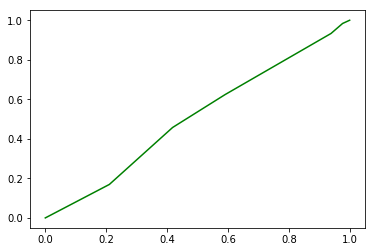

In [47]:
cluster_da = top_values(prob_cluster_da,2)
cluster_dd = top_values(prob_cluster_dd,2)
cluster_df = top_values(prob_cluster_df,2)
cluster_dh = top_values(prob_cluster_dh,2)
cluster_ds = top_values(prob_cluster_ds,2)
cluster_dsu = top_values(prob_cluster_dsu,2)

idx_data_2 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_2, dtype=int)

x_data = np_image_array[:,idx_data]

nb_predict(x_data, y_data)

## With 5 best features 

[[ 46  12  61 218 252 213 205]
 [  7   2   5  31  21  31  19]
 [ 28  15  77 222 170 351 196]
 [ 52  18  88 610 251 336 404]
 [ 39   8  84 239 324 236 273]
 [ 11   5  31 131  80 440 134]
 [ 13   7  57 269 201 231 424]]
              precision    recall  f1-score   support

           0       0.23      0.05      0.08      1007
           1       0.03      0.02      0.02       116
           2       0.19      0.07      0.11      1059
           3       0.35      0.35      0.35      1759
           4       0.25      0.27      0.26      1203
           5       0.24      0.53      0.33       832
           6       0.26      0.35      0.30      1202

   micro avg       0.27      0.27      0.27      7178
   macro avg       0.22      0.23      0.21      7178
weighted avg       0.26      0.27      0.24      7178



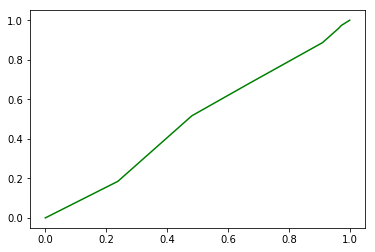

In [48]:
cluster_da = top_values(prob_cluster_da,5)
cluster_dd = top_values(prob_cluster_dd,5)
cluster_df = top_values(prob_cluster_df,5)
cluster_dh = top_values(prob_cluster_dh,5)
cluster_ds = top_values(prob_cluster_ds,5)
cluster_dsu = top_values(prob_cluster_dsu,5)

idx_data_5 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_5, dtype=int)

x_data = np_image_array[:,idx_data]

nb_predict(x_data, y_data)

## With 10 best features  

[[ 32  93  76 160 216 227 219]
 [  3  15   5  25  14  29  19]
 [ 15  71  78 117 186 325 205]
 [ 36 147 100 457 296 369 487]
 [ 36  80  85 152 323 222 268]
 [ 10  29  34  78  79 419 161]
 [ 25  68  61 173 222 221 410]]
              precision    recall  f1-score   support

           0       0.20      0.03      0.05      1023
           1       0.03      0.14      0.05       110
           2       0.18      0.08      0.11       997
           3       0.39      0.24      0.30      1892
           4       0.24      0.28      0.26      1166
           5       0.23      0.52      0.32       810
           6       0.23      0.35      0.28      1180

   micro avg       0.24      0.24      0.24      7178
   macro avg       0.22      0.23      0.20      7178
weighted avg       0.26      0.24      0.23      7178



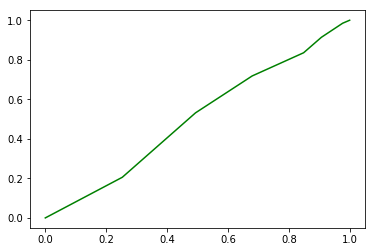

In [49]:
cluster_da = top_values(prob_cluster_da,10)
cluster_dd = top_values(prob_cluster_dd,10)
cluster_df = top_values(prob_cluster_df,10)
cluster_dh = top_values(prob_cluster_dh,10)
cluster_ds = top_values(prob_cluster_ds,10)
cluster_dsu = top_values(prob_cluster_dsu,10)

idx_data_10 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_10, dtype=int)

x_data = np_image_array[:,idx_data]

nb_predict(x_data, y_data)

## With 25 best features  

[[ 29 238  36  76 217 193 215]
 [  6  31   1  12  10  25  28]
 [ 30 187  52  73 161 310 198]
 [ 55 374  44 315 248 299 447]
 [ 36 214  40  96 345 209 290]
 [  6  92  26  41  77 435 138]
 [ 25 169  35 121 226 208 439]]
              precision    recall  f1-score   support

           0       0.16      0.03      0.05      1004
           1       0.02      0.27      0.04       113
           2       0.22      0.05      0.08      1011
           3       0.43      0.18      0.25      1782
           4       0.27      0.28      0.27      1230
           5       0.26      0.53      0.35       815
           6       0.25      0.36      0.29      1223

   micro avg       0.23      0.23      0.23      7178
   macro avg       0.23      0.24      0.19      7178
weighted avg       0.28      0.23      0.22      7178



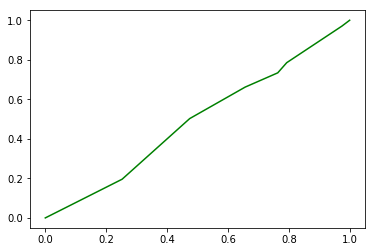

In [50]:
cluster_da = top_values(prob_cluster_da,25)
cluster_dd = top_values(prob_cluster_dd,25)
cluster_df = top_values(prob_cluster_df,25)
cluster_dh = top_values(prob_cluster_dh,25)
cluster_ds = top_values(prob_cluster_ds,25)
cluster_dsu = top_values(prob_cluster_dsu,25)

idx_data_25 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_25, dtype=int)

x_data = np_image_array[:,idx_data]

nb_predict(x_data, y_data)

## With 50 best features  

[[ 37 220  51  71 250 203 185]
 [  4  36   0   7  27  23  18]
 [ 31 201  47  59 211 292 186]
 [ 45 417  57 281 287 282 365]
 [ 37 254  51  68 362 186 275]
 [ 10 118  28  22  85 432 132]
 [ 26 209  37 115 259 216 363]]
              precision    recall  f1-score   support

           0       0.19      0.04      0.06      1017
           1       0.02      0.31      0.05       115
           2       0.17      0.05      0.07      1027
           3       0.45      0.16      0.24      1734
           4       0.24      0.29      0.27      1233
           5       0.26      0.52      0.35       827
           6       0.24      0.30      0.26      1225

   micro avg       0.22      0.22      0.22      7178
   macro avg       0.23      0.24      0.19      7178
weighted avg       0.27      0.22      0.21      7178



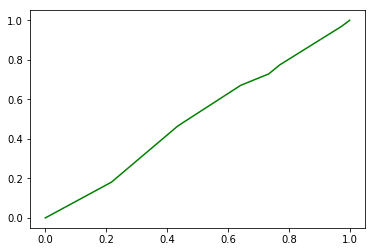

In [51]:
cluster_da = top_values(prob_cluster_da,50)
cluster_dd = top_values(prob_cluster_dd,50)
cluster_df = top_values(prob_cluster_df,50)
cluster_dh = top_values(prob_cluster_dh,50)
cluster_ds = top_values(prob_cluster_ds,50)
cluster_dsu = top_values(prob_cluster_dsu,50)

idx_data_50 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_50, dtype=int)

x_data = np_image_array[:,idx_data]

nb_predict(x_data, y_data)

## Random Forest Classifier with complete dataset

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf = RandomForestClassifier(n_estimators=7)
clf = clf.fit(X_train,y_train)

In [54]:
predict1 = clf.predict(X_test)

In [55]:
print(metrics.classification_report(y_test, predict1))
print(metrics.confusion_matrix(y_test,predict1))

              precision    recall  f1-score   support

           0       0.21      0.26      0.23       962
           1       0.58      0.27      0.37       111
           2       0.27      0.31      0.29      1024
           3       0.43      0.53      0.47      1830
           4       0.28      0.23      0.25      1221
           5       0.56      0.46      0.50       792
           6       0.36      0.23      0.28      1238

   micro avg       0.35      0.35      0.35      7178
   macro avg       0.38      0.33      0.34      7178
weighted avg       0.36      0.35      0.35      7178

[[254   3 167 242 142  47 107]
 [ 21  30  11  18  20   4   7]
 [158   4 317 248 123  80  94]
 [258   5 215 969 195  56 132]
 [246   3 187 310 285  60 130]
 [ 68   5 120 127  62 363  47]
 [212   2 172 336 189  39 288]]


In [56]:
def rf_predict(x_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    classifier = RandomForestClassifier(n_estimators=7)
    classifier.fit(X_train, y_train) 

    y_pred = classifier.predict(X_test)  
    print(metrics.confusion_matrix(y_test, y_pred))  
    print(metrics.classification_report(y_test, y_pred))

## RF With 2 best features  

In [57]:
cluster_da = top_values(prob_cluster_da,2)
cluster_dd = top_values(prob_cluster_dd,2)
cluster_df = top_values(prob_cluster_df,2)
cluster_dh = top_values(prob_cluster_dh,2)
cluster_ds = top_values(prob_cluster_ds,2)
cluster_dsu = top_values(prob_cluster_dsu,2)

idx_data_2 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_2, dtype=int)

x_data = np_image_array[:,idx_data]

rf_predict(x_data, y_data)

[[258  10 144 275 144  56  96]
 [ 18  29   5  29  16   3   9]
 [165   6 265 284 117  72 117]
 [300   5 216 795 189  79 190]
 [205   4 178 363 227  66 135]
 [ 98   4 114 155  87 339  57]
 [194   3 163 402 189  58 245]]
              precision    recall  f1-score   support

           0       0.21      0.26      0.23       983
           1       0.48      0.27      0.34       109
           2       0.24      0.26      0.25      1026
           3       0.35      0.45      0.39      1774
           4       0.23      0.19      0.21      1178
           5       0.50      0.40      0.44       854
           6       0.29      0.20      0.23      1254

   micro avg       0.30      0.30      0.30      7178
   macro avg       0.33      0.29      0.30      7178
weighted avg       0.30      0.30      0.30      7178



##  RF With 5 best features 

In [58]:
cluster_da = top_values(prob_cluster_da,5)
cluster_dd = top_values(prob_cluster_dd,5)
cluster_df = top_values(prob_cluster_df,5)
cluster_dh = top_values(prob_cluster_dh,5)
cluster_ds = top_values(prob_cluster_ds,5)
cluster_dsu = top_values(prob_cluster_dsu,5)

idx_data_5 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_5, dtype=int)

x_data = np_image_array[:,idx_data]

rf_predict(x_data, y_data)

[[288   6 131 271 159  52 106]
 [ 22  28  10  20  13  10   8]
 [161   4 307 235 138  73  94]
 [311   8 203 863 200  62 211]
 [174   4 176 348 279  44 128]
 [ 94   3 108 143  51 376  44]
 [188   2 189 355 169  60 249]]
              precision    recall  f1-score   support

           0       0.23      0.28      0.26      1013
           1       0.51      0.25      0.34       111
           2       0.27      0.30      0.29      1012
           3       0.39      0.46      0.42      1858
           4       0.28      0.24      0.26      1153
           5       0.56      0.46      0.50       819
           6       0.30      0.21      0.24      1212

   micro avg       0.33      0.33      0.33      7178
   macro avg       0.36      0.32      0.33      7178
weighted avg       0.34      0.33      0.33      7178



## RF With 10 best features 

In [59]:
cluster_da = top_values(prob_cluster_da,10)
cluster_dd = top_values(prob_cluster_dd,10)
cluster_df = top_values(prob_cluster_df,10)
cluster_dh = top_values(prob_cluster_dh,10)
cluster_ds = top_values(prob_cluster_ds,10)
cluster_dsu = top_values(prob_cluster_dsu,10)

idx_data_10 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_10, dtype=int)

x_data = np_image_array[:,idx_data]

rf_predict(x_data, y_data)

[[269   4 129 277 142  43  88]
 [ 15  28  10  23  15   7   6]
 [186   3 287 275 124  80 105]
 [264   4 201 891 207  71 169]
 [249   4 203 332 260  52 133]
 [ 83   0 104 125  62 355  44]
 [210   1 177 359 164  57 281]]
              precision    recall  f1-score   support

           0       0.21      0.28      0.24       952
           1       0.64      0.27      0.38       104
           2       0.26      0.27      0.26      1060
           3       0.39      0.49      0.44      1807
           4       0.27      0.21      0.24      1233
           5       0.53      0.46      0.49       773
           6       0.34      0.22      0.27      1249

   micro avg       0.33      0.33      0.33      7178
   macro avg       0.38      0.32      0.33      7178
weighted avg       0.34      0.33      0.33      7178



## RF With 25 best features 

In [60]:
cluster_da = top_values(prob_cluster_da,25)
cluster_dd = top_values(prob_cluster_dd,25)
cluster_df = top_values(prob_cluster_df,25)
cluster_dh = top_values(prob_cluster_dh,25)
cluster_ds = top_values(prob_cluster_ds,25)
cluster_dsu = top_values(prob_cluster_dsu,25)

idx_data_25 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_25, dtype=int)

x_data = np_image_array[:,idx_data]

rf_predict(x_data, y_data)

[[303   1 154 255 147  43  89]
 [ 14  32  17  28   9   3   8]
 [188   0 302 226 141  84 122]
 [264   2 234 883 190  63 173]
 [224   5 165 335 278  44 127]
 [ 95   2  83 138  75 368  56]
 [193   6 176 365 162  41 265]]
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       992
           1       0.67      0.29      0.40       111
           2       0.27      0.28      0.28      1063
           3       0.40      0.49      0.44      1809
           4       0.28      0.24      0.26      1178
           5       0.57      0.45      0.50       817
           6       0.32      0.22      0.26      1208

   micro avg       0.34      0.34      0.34      7178
   macro avg       0.39      0.32      0.34      7178
weighted avg       0.35      0.34      0.34      7178



## RF With 50 best features 

In [61]:
cluster_da = top_values(prob_cluster_da,50)
cluster_dd = top_values(prob_cluster_dd,50)
cluster_df = top_values(prob_cluster_df,50)
cluster_dh = top_values(prob_cluster_dh,50)
cluster_ds = top_values(prob_cluster_ds,50)
cluster_dsu = top_values(prob_cluster_dsu,50)

idx_data_50 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_50, dtype=int)

x_data = np_image_array[:,idx_data]

rf_predict(x_data, y_data)

[[297   1 140 244 114  42 116]
 [ 15  36  10  23   9   3   9]
 [185   5 296 218 136  65 101]
 [266   5 247 879 188  53 154]
 [241   2 209 314 289  45 165]
 [ 77   3 121 143  74 383  43]
 [186   5 165 348 157  56 295]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.27       954
           1       0.63      0.34      0.44       105
           2       0.25      0.29      0.27      1006
           3       0.41      0.49      0.44      1792
           4       0.30      0.23      0.26      1265
           5       0.59      0.45      0.51       844
           6       0.33      0.24      0.28      1212

   micro avg       0.34      0.34      0.34      7178
   macro avg       0.39      0.34      0.35      7178
weighted avg       0.36      0.34      0.34      7178



## RF with 500 images dataset

In [379]:
clf500 = RandomForestClassifier(n_estimators=7)
clf500 = clf500.fit(X_train500,y_train500)

In [380]:
predictRF500 = clf500.predict(X_test500)

In [381]:
print(metrics.classification_report(y_test500, predictRF500))
print(metrics.confusion_matrix(y_test500,predictRF500))

              precision    recall  f1-score   support

           0       0.18      0.28      0.22        98
           1       0.40      0.40      0.40       107
           2       0.16      0.18      0.17       102
           3       0.15      0.18      0.16        87
           4       0.20      0.12      0.15       113
           5       0.32      0.33      0.32        92
           6       0.26      0.15      0.19       101

   micro avg       0.23      0.23      0.23       700
   macro avg       0.24      0.23      0.23       700
weighted avg       0.24      0.23      0.23       700

[[27  8 17 14  7 14 11]
 [19 43 17 13  2  6  7]
 [23 13 18 12 15 15  6]
 [22 12 14 16  6  8  9]
 [27 16 21 18 14 13  4]
 [15  7 12 13 10 30  5]
 [19  9 14 21 16  7 15]]


## DecisionTreeClassifier with complete dataset

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dy = DecisionTreeClassifier()

In [65]:
dy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
tan_P = dy.predict(X_test)

In [68]:
print(metrics.classification_report(y_test, tan_P))
print(metrics.confusion_matrix(y_test,tan_P))

              precision    recall  f1-score   support

           0       0.22      0.23      0.23       962
           1       0.27      0.26      0.27       111
           2       0.24      0.26      0.25      1024
           3       0.43      0.42      0.42      1830
           4       0.25      0.24      0.25      1221
           5       0.44      0.48      0.46       792
           6       0.28      0.26      0.27      1238

   micro avg       0.32      0.32      0.32      7178
   macro avg       0.30      0.31      0.31      7178
weighted avg       0.32      0.32      0.32      7178

[[220  17 129 194 188  66 148]
 [  9  29  15  22  16   9  11]
 [146   6 263 210 140  97 162]
 [209  19 228 763 243 123 245]
 [158  14 214 239 299 109 188]
 [ 66   7  89 100  72 383  75]
 [171  14 177 250 220  86 320]]


## DT With 50 best features 

In [253]:
cluster_da = top_values(prob_cluster_da,50)
cluster_dd = top_values(prob_cluster_dd,50)
cluster_df = top_values(prob_cluster_df,50)
cluster_dh = top_values(prob_cluster_dh,50)
cluster_ds = top_values(prob_cluster_ds,50)
cluster_dsu = top_values(prob_cluster_dsu,50)

idx_data_50 = np.unique(np.concatenate((cluster_da[0], cluster_dd[0], cluster_df[0], cluster_dh[0], cluster_ds[0], cluster_dsu[0]),axis=0))
idx_data = np.asarray(idx_data_50, dtype=int)

x_data1 = np_image_array1[:,idx_data]

rf_predict(x_data1, y_data1)

[[19 12 10 17 13 12 12]
 [20 55 13 17  8  5  5]
 [23 10 20 11 12  9  8]
 [18 16 15 19  7  8  9]
 [32 17 17 13 17  7  7]
 [17 13 14  9  6 33  5]
 [14 14 10 16 17  4 15]]
              precision    recall  f1-score   support

           0       0.13      0.20      0.16        95
           1       0.40      0.45      0.42       123
           2       0.20      0.22      0.21        93
           3       0.19      0.21      0.20        92
           4       0.21      0.15      0.18       110
           5       0.42      0.34      0.38        97
           6       0.25      0.17      0.20        90

   micro avg       0.25      0.25      0.25       700
   macro avg       0.26      0.25      0.25       700
weighted avg       0.26      0.25      0.26       700



## DT with 500 image dataset 

In [382]:
dy500 = DecisionTreeClassifier()
dy500.fit(X_train500,y_train500)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [383]:
tan_P500 = dy.predict(X_test500)

In [384]:
print(metrics.classification_report(y_test500, tan_P500))
print(metrics.confusion_matrix(y_test500,tan_P500))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        98
           1       0.97      0.58      0.73       107
           2       0.64      0.64      0.64       102
           3       0.60      0.85      0.70        87
           4       0.75      0.78      0.76       113
           5       0.84      0.78      0.81        92
           6       0.70      0.74      0.72       101

   micro avg       0.73      0.73      0.73       700
   macro avg       0.75      0.73      0.73       700
weighted avg       0.75      0.73      0.73       700

[[75  1  5  8  6  0  3]
 [ 4 62  6 16  7  4  8]
 [11  0 65  8  6  6  6]
 [ 0  1  4 74  2  1  5]
 [ 6  0  6  7 88  1  5]
 [ 0  0  8  3  4 72  5]
 [ 5  0  7  7  5  2 75]]


## Agglomerative clustering 

In [364]:
from sklearn.cluster import AgglomerativeClustering

In [368]:
agglomerative = AgglomerativeClustering(n_clusters=7, linkage="ward")
agglomerative.fit(X_train500)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=7,
            pooling_func='deprecated')

In [370]:
predictionsagg = agglomerative.fit_predict(X_train500,y_train500)

In [371]:
print(metrics.classification_report(y_train500, predictionsagg))
print(metrics.confusion_matrix(y_train500,predictionsagg))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11       402
           1       0.19      0.11      0.14       393
           2       0.18      0.29      0.22       398
           3       0.16      0.12      0.14       413
           4       0.12      0.09      0.11       387
           5       0.26      0.27      0.27       408
           6       0.17      0.16      0.16       399

   micro avg       0.17      0.17      0.17      2800
   macro avg       0.17      0.17      0.16      2800
weighted avg       0.17      0.17      0.16      2800

[[ 50  40  97  56  52  44  63]
 [ 76  43  80  22  39  81  52]
 [ 62  35 117  40  33  62  49]
 [ 92  36  87  50  47  52  49]
 [ 57  25 103  75  36  34  57]
 [ 93  16  99  12  39 112  37]
 [ 87  35  72  55  43  44  63]]


## K means with complete dataset 

In [348]:
from sklearn.cluster import KMeans

In [349]:
modelKM = KMeans(n_clusters=7)

In [350]:
modelKM.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [351]:
predictionsUn = modelKM.predict(X_train)

In [352]:
print(predictionsUn)

[0 4 1 ... 2 3 4]


In [278]:
predictionsUn.size

28709

In [279]:
len(X_train)

28709

In [353]:
print(metrics.classification_report(y_train, predictionsUn))
print(metrics.confusion_matrix(y_train,predictionsUn))

              precision    recall  f1-score   support

           0       0.15      0.17      0.16      3999
           1       0.01      0.07      0.02       446
           2       0.18      0.16      0.17      4068
           3       0.22      0.12      0.16      7202
           4       0.15      0.13      0.14      4840
           5       0.13      0.19      0.15      3198
           6       0.17      0.14      0.15      4956

   micro avg       0.15      0.15      0.15     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.15      0.15     28709

[[ 667  564  548  451  498  604  667]
 [  60   32   53   76   81   79   65]
 [ 655  360  661  736  455  662  539]
 [1001  791  721  889 1442 1306 1052]
 [ 827  913  514  481  652  590  863]
 [ 416  133  512  893  428  592  224]
 [ 700  813  607  511  925  700  700]]


## KMeans with 500 image dataset 

In [281]:
modelK500 = KMeans(n_clusters=7)

In [282]:
modelK.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [283]:
predictionsUn500 = modelK.predict(X_train500)

In [287]:
print(metrics.classification_report(y_train, predictionsUn))
print(metrics.confusion_matrix(y_train,predictionsUn))

              precision    recall  f1-score   support

           0       0.15      0.14      0.14      3947
           1       0.02      0.16      0.03       442
           2       0.15      0.15      0.15      4109
           3       0.22      0.11      0.15      7203
           4       0.22      0.19      0.20      4883
           5       0.22      0.27      0.24      3194
           6       0.21      0.18      0.20      4931

   micro avg       0.17      0.17      0.17     28709
   macro avg       0.17      0.17      0.16     28709
weighted avg       0.19      0.17      0.17     28709

[[ 551  592  630  574  669  451  480]
 [  54   72   56   36   65   80   79]
 [ 658  654  617  381  580  747  472]
 [ 743 1263  993  811 1077  901 1415]
 [ 535  563  818  945  906  474  642]
 [ 535  596  418  142  233  873  397]
 [ 643  730  636  850  661  501  910]]


In [354]:
modelKMean500 = KMeans(n_clusters=7)

In [355]:
modelKMean500.fit(X_train500,y_train500)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [357]:
predictionsUnKM500 = modelKMean500.predict(X_train500)

In [358]:
print(metrics.classification_report(y_train500, predictionsUnKM500))
print(metrics.confusion_matrix(y_train500,predictionsUnKM500))

              precision    recall  f1-score   support

           0       0.16      0.14      0.15       402
           1       0.19      0.20      0.20       393
           2       0.10      0.11      0.10       398
           3       0.12      0.13      0.12       413
           4       0.23      0.25      0.24       387
           5       0.22      0.21      0.21       408
           6       0.16      0.13      0.15       399

   micro avg       0.17      0.17      0.17      2800
   macro avg       0.17      0.17      0.17      2800
weighted avg       0.17      0.17      0.17      2800

[[ 57  43  60  77  74  43  48]
 [ 52  79  67  48  45  58  44]
 [ 56  62  43  78  51  63  45]
 [ 55  49  87  53  58  59  52]
 [ 54  33  52  73  98  35  42]
 [ 42 106  53  64  16  86  41]
 [ 37  43  81  54  79  52  53]]


## Kmeans using the same predictions as input 

In [359]:
modeltry = KMeans()

In [360]:
modeltry.fit(X_train500,y_train500)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [361]:
predictionstry = modeltry.predict(X_train500)

In [362]:
print(metrics.classification_report(y_train500, predictionstry))
print(metrics.confusion_matrix(y_train500,predictionstry))

              precision    recall  f1-score   support

           0       0.17      0.13      0.14       402
           1       0.10      0.09      0.10       393
           2       0.10      0.10      0.10       398
           3       0.16      0.13      0.14       413
           4       0.11      0.07      0.08       387
           5       0.07      0.06      0.06       408
           6       0.11      0.10      0.11       399
           7       0.00      0.00      0.00         0

   micro avg       0.10      0.10      0.10      2800
   macro avg       0.10      0.08      0.09      2800
weighted avg       0.12      0.10      0.11      2800

[[51 60 50 41 41 59 33 67]
 [47 35 67 46 25 51 74 48]
 [53 38 41 59 32 44 58 73]
 [48 46 80 54 33 54 45 53]
 [38 74 48 32 26 72 30 67]
 [38 16 59 70 37 24 92 72]
 [32 66 73 40 40 58 41 49]
 [ 0  0  0  0  0  0  0  0]]


/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bigmb/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


###  Keras Model

In [325]:
import sys, os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [326]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [327]:
dataK = pd.read_csv('fer2018/fer2018.csv')

In [329]:
pixels = dataK['pixels'].tolist() 

faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')] 
    face = np.asarray(face).reshape(width, height) 
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1) 

emotions = pd.get_dummies(dataK['emotion']).as_matrix() 

/home/bigmb/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [330]:
XK_train, XK_test, yK_train, yK_test = train_test_split(faces, emotions, test_size=0.15, random_state=42)
XK_train, XK_val, yK_train, yK_val = train_test_split(XK_train, yK_train, test_size=0.15, random_state=41)

In [331]:
modelK = Sequential()

modelK.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
modelK.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
modelK.add(BatchNormalization())
modelK.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelK.add(Dropout(0.5))

modelK.add(Flatten())

modelK.add(Dense(2*2*2*num_features, activation='relu'))
modelK.add(Dropout(0.4))
modelK.add(Dense(2*2*num_features, activation='relu'))
modelK.add(Dropout(0.4))
modelK.add(Dense(2*num_features, activation='relu'))
modelK.add(Dropout(0.5))

modelK.add(Dense(num_labels, activation='softmax'))

In [332]:
modelK.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 128)       512       
__________

In [333]:
modelK.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [335]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

In [336]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

In [338]:
MODELPATH = './model.h5'
checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)

In [339]:
tensorboard = TensorBoard(log_dir='./logs')

In [340]:
modelK.fit(np.array(XK_train), np.array(yK_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(XK_test), np.array(yK_test)),
          shuffle=True,
          callbacks=[lr_reducer, tensorboard, early_stopper, checkpointer])

Train on 25927 samples, validate on 5384 samples
Epoch 1/100
25927/25927 [==============================] - 40s 2ms/step - loss: 2.0559 - acc: 0.2136 - val_loss: 1.8414 - val_acc: 0.2428

Epoch 00001: val_loss improved from inf to 1.84137, saving model to ./model.h5
Epoch 2/100
25927/25927 [==============================] - 31s 1ms/step - loss: 1.8485 - acc: 0.2393 - val_loss: 1.8202 - val_acc: 0.2431

Epoch 00002: val_loss improved from 1.84137 to 1.82017, saving model to ./model.h5
Epoch 3/100
25927/25927 [==============================] - 32s 1ms/step - loss: 1.8190 - acc: 0.2531 - val_loss: 1.8109 - val_acc: 0.2502

Epoch 00003: val_loss improved from 1.82017 to 1.81092, saving model to ./model.h5
Epoch 4/100
25927/25927 [==============================] - 32s 1ms/step - loss: 1.7713 - acc: 0.2826 - val_loss: 1.8774 - val_acc: 0.2483

Epoch 00004: val_loss did not improve from 1.81092
Epoch 5/100
25927/25927 [==============================] - 32s 1ms/step - loss: 1.6856 - acc: 0.325

25927/25927 [==============================] - 31s 1ms/step - loss: 0.7072 - acc: 0.7517 - val_loss: 1.1002 - val_acc: 0.6356

Epoch 00039: val_loss did not improve from 1.05340
Epoch 00039: early stopping


In [342]:
scores = modelK.evaluate(np.array(XK_test), np.array(yK_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

5384/5384 [==============================] - 2s 374us/step
Loss: 1.1001719017616884
Accuracy: 0.6355869242199108


In [343]:
scores1 = modelK.evaluate(np.array(XK_train), np.array(yK_train), batch_size=batch_size)
print("Loss: " + str(scores1[0]))
print("Accuracy: " + str(scores1[1]))

25927/25927 [==============================] - 10s 375us/step
Loss: 0.4446064614530525
Accuracy: 0.8528946657947161
